# Potencial y Campo eléctrico

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from skimage.draw import disk, circle_perimeter

from datetime import datetime

## Potencial de cargas puntuales

In [62]:
np.seterr(divide='ignore')  # Elimina advertencia al dividir por cero.

def fmt(x):
    s = f"{x:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s} V" if plt.rcParams["text.usetex"] else f"{s} V"

def P_puntuales(cargas, dim, levels = 5, roi=(0,0,0), figsize=(6,6), titulo='Título',
                EF = False, density=1, dq=0.02):
    x = np.arange(-dim, dim+1)
    y = np.arange(-dim, dim+1)
    X, Y = np.meshgrid(x, y)
    V = x*y
    V = V*0
    for carga in cargas:
        xq, yq, q = carga
        D = np.sqrt(np.power(X - xq, 2) + 
                    np.power(Y - yq, 2))
        V = V + 9E9 * 1000 * q / D

    fig, ax = plt.subplots(1, 1, figsize=figsize,facecolor=(1, 1, 1) )
    # CS2 = ax.contour(X, Y, V, levels=levels)
    # ax.clabel(CS2, inline=True, fmt=fmt, fontsize=10)
    ax.set_title(titulo)
    for carga in cargas:
        xq, yq, q = carga
        circ = plt.Circle((xq,yq), dq*dim, color='red')
        ax.add_patch(circ)
    if roi[2]>0:
        plt.xlim((roi[0], roi[0]+roi[2]))
        plt.ylim((roi[1], roi[1]+roi[2]))
    
    if EF:
        CS2 = ax.contour(X, Y, V, levels=levels, alpha=0.4)
        E = np.gradient(-1*V)
        ax.streamplot(X, Y, E[1], E[0], linewidth=1, cmap=plt.cm.inferno,
              density=density, arrowstyle='->', arrowsize=1.5)
    else:
        CS2 = ax.contour(X, Y, V, levels=levels, alpha=1)
    ax.clabel(CS2, inline=True, fmt=fmt, fontsize=10)

    plt.xlabel('x [mm]')
    plt.ylabel('y [mm]')
    plt.grid()
    plt.show()
        
    return V

            

### Una carga puntual

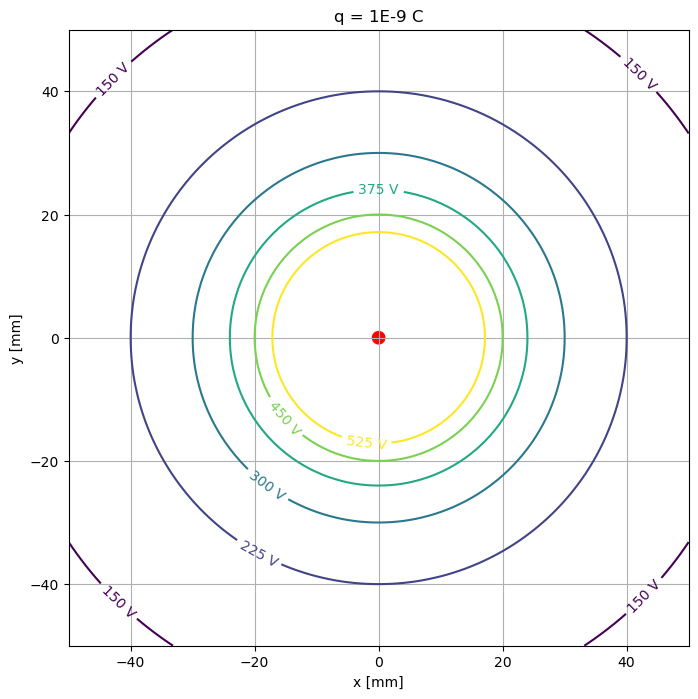

In [64]:
cargas = [
    [0, 0, 1E-9],
]
levels = np.arange(150,600,75)
# levels = [150, 200, ,600]
# levels = 20
titulo = "q = 1E-9 C"
figsize = (8,8)
EF = False
density = 0.5
P = P_puntuales(cargas, 50, levels=levels, figsize=figsize, titulo=titulo, EF=EF, density=density)


### Dos cargas

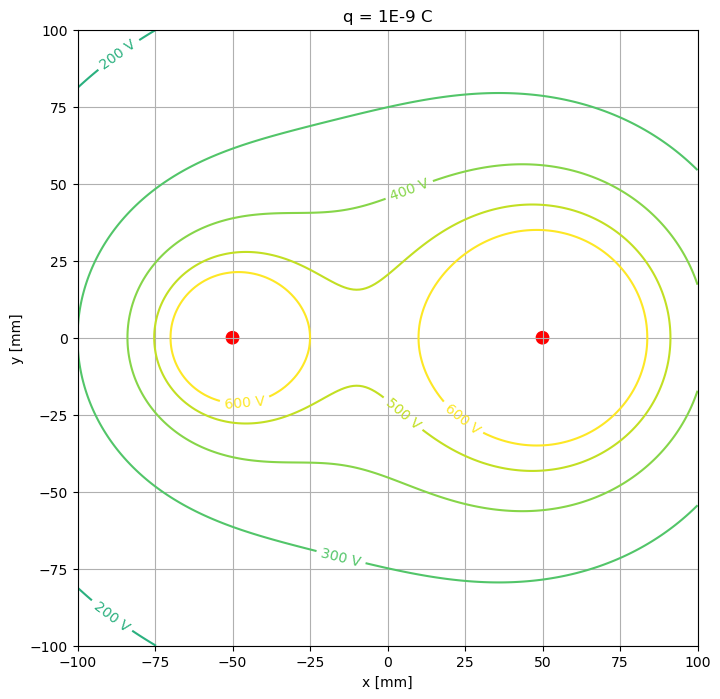

In [73]:
cargas = [
    [-50, 0, 1E-9],
    [50, 0, 2E-9],
    # [20, 75, 1E-9],

]
levels = np.arange(-500,-100,100)
levels = np.concatenate([levels, np.arange(-100,100,25)])
levels = np.concatenate([levels, np.arange(100,700,100)])
# levels = [150, 200, ,600]
# levels = 1
titulo = "q = 1E-9 C"
figsize = (8,8)
EF = False
density = 1
P = P_puntuales(cargas, 100, levels=levels, figsize=figsize, titulo=titulo, EF=EF, density=density)

### Ejercicio 14.6

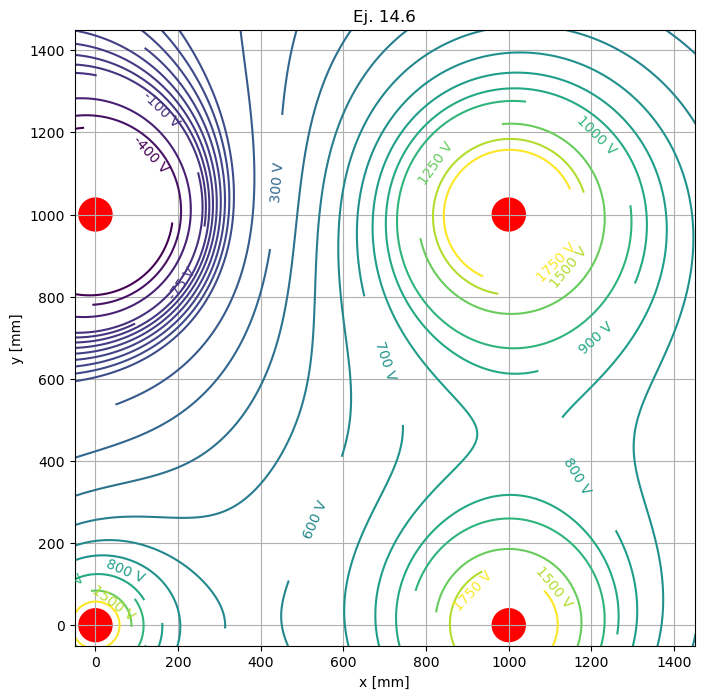

In [44]:
cargas = [
    [0, 0, 10E-9],
    [0, 1000, -20E-9],
    [1000, 1000, 30E-9],
    [1000, 0, 20E-9],
]
levels = np.arange(-400,-100,100)
levels = np.concatenate([levels, np.arange(-100,100,25)])
levels = np.concatenate([levels, np.arange(100,1000,100)])
levels = np.concatenate([levels, np.arange(1000,2000,250)])
# levels = [150, 200, ,600]
# levels = 1
roi = (-50,-50, 1500)
titulo = "Ej. 14.6"
figsize = (8,8)
EF = False
density = 2
P = P_puntuales(cargas, 2000, levels=levels, roi=roi, figsize=figsize, titulo=titulo, EF=EF, density=density)


### Línea de cargas puntuales

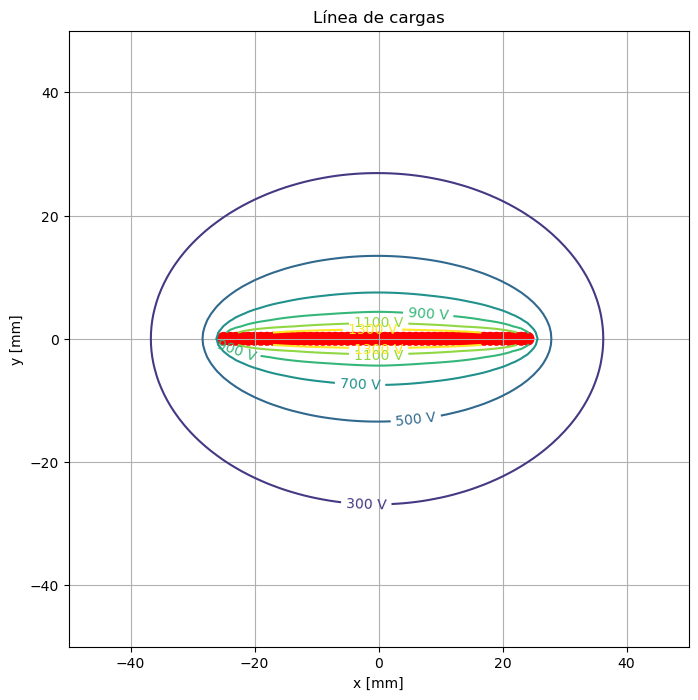

In [80]:
Q = 1E-9
L = 50
N = 100

cargas = []
dq = Q/N
x = -int(L/2)
dx = L/N
for j in np.arange(N):
    cargas = cargas + [[int(x+j*dx),0,dq]]

levels = np.arange(100,1400,200)
# levels = 5
roi = (-50, -50, 100)
# roi = (0, 0, 0)
titulo = "Línea de cargas"
figsize = (8,8)
EF = False
density = 0.6
P = P_puntuales(cargas, 200, levels=levels, roi=roi, figsize=figsize, titulo=titulo, EF=EF, density=density, dq=0.005)


### Dos líneas paralelas

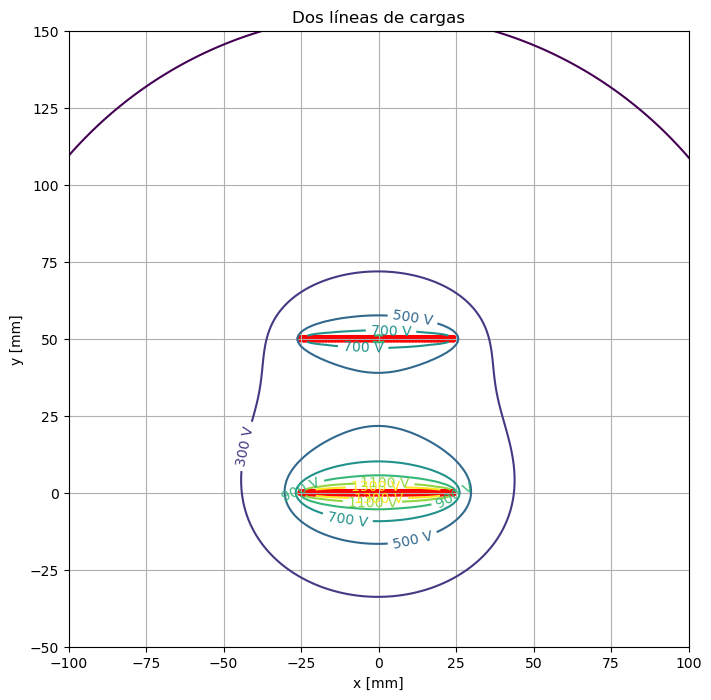

In [81]:
Q1 = 1E-9
Q2 = 0.5E-9
L = 50
N = 100

cargas = []
dq = Q1/N
dq2 = Q2/N
x = -int(L/2)
dx = L/N
for j in np.arange(N):
    cargas = cargas + [[int(x+j*dx),0,dq]]
    cargas = cargas + [[int(x+j*dx),50,dq2]]

levels = np.arange(100,1400,200)
# levels = np.concatenate([levels, np.arange(-100,100,25)])
# levels = np.concatenate([levels, np.arange(100,1000,100)])
# levels = np.concatenate([levels, np.arange(1000,2000,250)])
# levels = [150, 200, ,600]
# levels = 5
roi = (-100, -50, 200)
# roi = (0, 0, 0)
titulo = "Dos líneas de cargas"
figsize = (8,8)
EF = False
density = 1
P = P_puntuales(cargas, 200, levels=levels, roi=roi, figsize=figsize, titulo=titulo, EF=EF, density=density, dq=0.005)

### Dos líneas perpendiculares

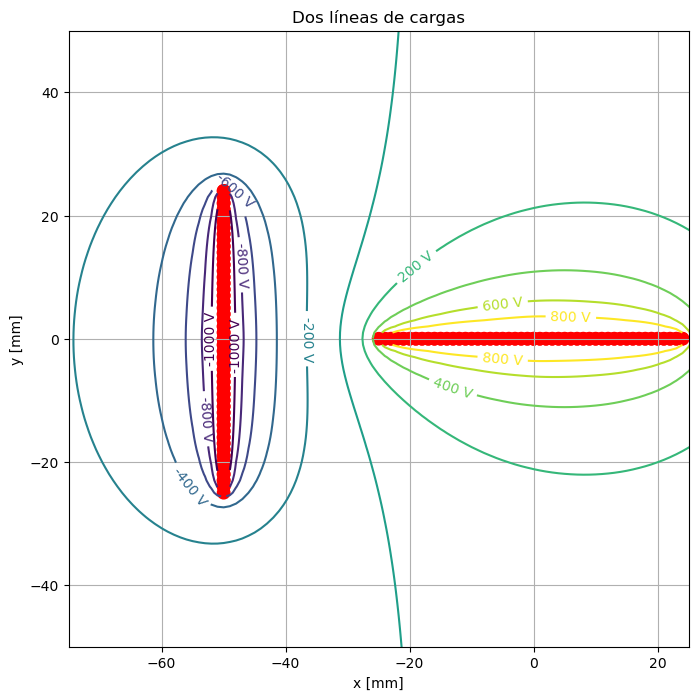

In [84]:
Q1 = 1E-9
Q2 = -1E-9
L = 50
N = 100

cargas = []
dq = Q1/N
dq2 = Q2/N
x = -int(L/2)
y = -int(L/2)
dx = L/N
for j in np.arange(N):
    cargas = cargas + [[int(x+j*dx),0,dq]]
    cargas = cargas + [[-50, int(y+j*dx),dq2]]

# levels = np.arange(100,1400,200)
levels = np.arange(-1000,1000,200)
# levels = 5
roi = (-75, -50, 100)
# roi = (0, 0, 0)
titulo = "Dos líneas de cargas"
figsize = (8,8)
EF = False
density = 1
P = P_puntuales(cargas, 200, levels=levels, roi=roi, figsize=figsize, titulo=titulo, EF=EF, density=density, dq=0.005)

## Conductores

In [70]:
np.seterr(divide='ignore')  # Elimina advertencia al dividir por cero.

# Configura el texto en las equipotenciales.
def fmt(x):
    s = f"{x:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s} V" if plt.rcParams["text.usetex"] else f"{s} V"

def P_conductores(V, dim, levels = 5, roi=(0,0,0), figsize=(6,6), titulo='Título',
                EF = False, density=1, patches=[]):
    x = np.arange(0, dim+1)
    y = np.arange(0, dim+1)
    X, Y = np.meshgrid(x, y)

    fig, ax = plt.subplots(1, 1, figsize=figsize,facecolor=(1, 1, 1) )
    # CS2 = ax.contour(X, Y, V, levels=levels)
    # ax.clabel(CS2, inline=True, fmt=fmt, fontsize=10)
    ax.set_title(titulo)
    if roi[2]>0:
        plt.xlim((roi[0], roi[0]+roi[2]))
        plt.ylim((roi[1], roi[1]+roi[2]))
    
    E = 0
    if EF:
        CS2 = ax.contour(X, Y, V, levels=levels, alpha=0.4)
        E = np.gradient(-1*V)
        ax.streamplot(X, Y, E[1], E[0], linewidth=1, cmap=plt.cm.inferno,
              density=density, arrowstyle='->', arrowsize=1.5)
    else:
        CS2 = ax.contour(X, Y, V, levels=levels, alpha=1)
    ax.clabel(CS2, inline=True, fmt=fmt, fontsize=10)
    for p in patches:
        ax.add_patch(p)

    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.show()
        
    return E

### Un rectángulo en una región abierta

In [49]:
# Rectangulo
Vs = 12
xs1 = 180
ys1 = 220
xs2 = 200
ys2 = 250

dim = 500
Niter = 100000
V = np.ndarray(shape=(dim+1,dim+1), dtype=float)

V[:,:] = 0
V[xs1:xs2,ys1:ys2] = Vs
# V[rr,cc] = Vold[rr,cc]
for i in range(Niter):
    V1 = np.roll(V,-1,axis=0)
    V2 = np.roll(V,1,axis=0)
    V3 = np.roll(V,-1,axis=1)
    V4 = np.roll(V,1,axis=1)
    V = (V1+V2+V3+V4)/4
    V[xs1:xs2,ys1:ys2]= Vs
    # V[rr1,cc1] = Vc
    # Vold = V.copy()
    # V[:,:] = 0
    # V[rr,cc] = Vold[rr,cc]
    print('Iteration '+str(i).zfill(6), end="\r")
    # print(np.mean((V-Vold)**2))


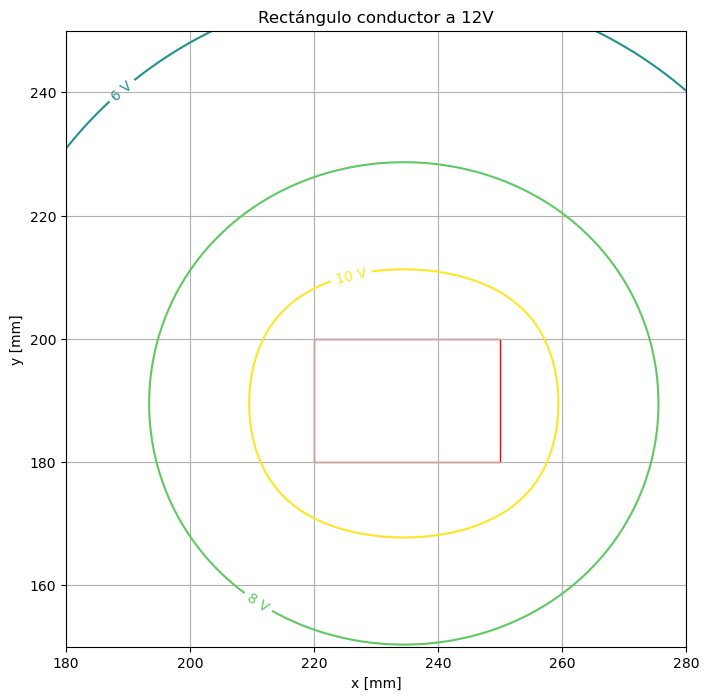

In [50]:
# levels = np.arange(100,1400,200)
levels = [2,4,6,8,10]
# levels = 5
roi = (180, 150, 100)
# roi = (0, 0, 0)
titulo = "Rectángulo conductor a 12V"
figsize = (8,8)
EF = False
density =3

patches = [plt.Rectangle((ys1,xs1), ys2-ys1, xs2-xs1, ec='red', fc='None')]
# patches = [ plt.Circle((xq,yq), dq*dim, color='red')

E = P_conductores(V, dim, levels = levels, roi=roi, figsize=figsize, titulo=titulo,
                EF=EF, density=density, patches=patches)

### Círculo conductor

In [67]:
#Círculo: 
xc = 200
yc = 200
R = 50
Vc = 12

dim = 450
Niter = 2000
V = np.ndarray(shape=(dim+1,dim+1), dtype=float)

rr1,cc1 = disk((yc,xc),R)
V[:,:] = 0
V[rr1,cc1] = Vc
for i in range(Niter):
    V1 = np.roll(V,-2,axis=0)
    V2 = np.roll(V,2,axis=0)
    V3 = np.roll(V,-2,axis=1)
    V4 = np.roll(V,2,axis=1)
    V = (V1+V2+V3+V4)/4
    V[rr1,cc1] = Vc
    print('Iteration '+str(i).zfill(6), end="\r")
    # print(np.mean((V-Vold)**2))

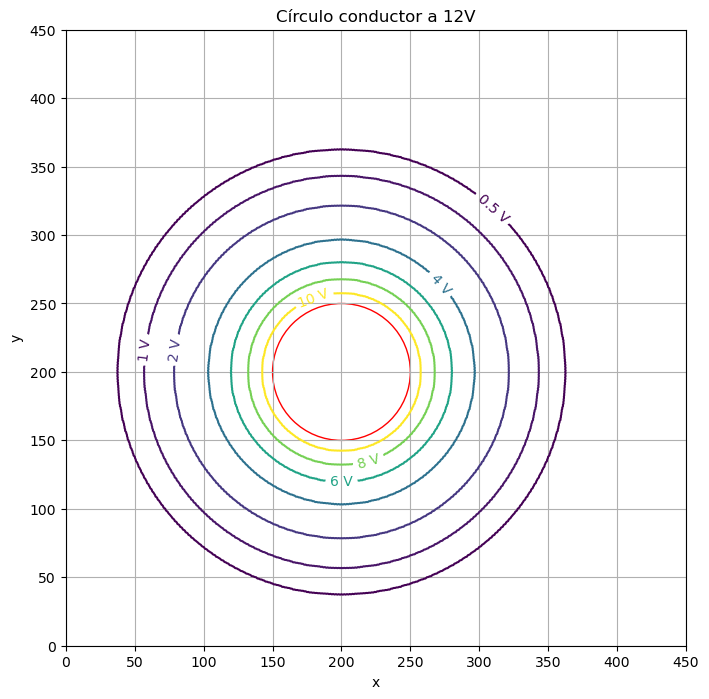

In [71]:
# levels = np.arange(100,1400,200)
levels = [0.5,1,2,4,6,8,10]
# levels = 5
# roi = (180, 150, 100)
roi = (0, 0, 0)
titulo = "Círculo conductor a 12V"
figsize = (8,8)
EF = False
density =3

patches = [plt.Circle((yc,xc), R, ec='red', fc='None')]

E = P_conductores(V, dim, levels = levels, roi=roi, figsize=figsize, titulo=titulo,
                EF=EF, density=density, patches=patches)

### Labo

In [88]:
#Círculo: 
xc = 60
yc = 230
R = 40
Vc = 12

# Rectangulo
xs1 = 300
ys1 = 25
xs2 = 380
ys2 = 100
Vs = 0

dim = 500
Niter = 10000
# V = np.ndarray(shape=(dim+1,dim+1), dtype=float)

rr1,cc1 = disk((yc,xc),R)
# V[:,:] = 0
# V[rr1,cc1] = Vc
# V[ys1:ys2,xs1:xs2] = Vs


for i in range(Niter):
    V1 = np.roll(V,-2,axis=0)
    V2 = np.roll(V,2,axis=0)
    V3 = np.roll(V,-2,axis=1)
    V4 = np.roll(V,2,axis=1)
    V = (V1+V2+V3+V4)/4
    V[ys1:ys2,xs1:xs2] = Vs
    V[rr1,cc1] = Vc
    print('Iteration '+str(i).zfill(6), end="\r")
    # print(np.mean((V-Vold)**2))

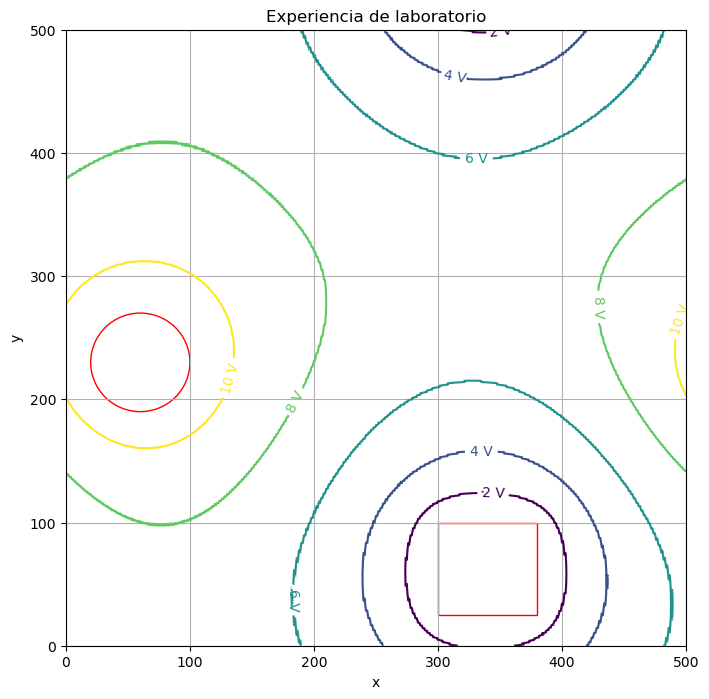

In [89]:
# levels = np.arange(100,1400,200)
levels = [2,4,6,8,10]
# levels = 5
# roi = (180, 150, 100)
roi = (0, 0, 0)
titulo = "Experiencia de laboratorio"
figsize = (8,8)
EF = False
density =3

patches = [plt.Circle((xc,yc), R, ec='red', fc='None'), plt.Rectangle((xs1,ys1), xs2-xs1, ys2-ys1, ec='red', fc='None')]

E = P_conductores(V, dim, levels = levels, roi=roi, figsize=figsize, titulo=titulo,
                EF=EF, density=density, patches=patches)

## Región abierta

In [86]:
ys1 = 220
ys2 = 300
xs1 = 180
xs2 = 200
Vs = -12
V[ys1:ys2,xs1:xs2] = Vs
#Circle: 
xc = 300
yc = 220
Vc = 12
rr1,cc1 = disk((yc,xc),20)
V[rr1,cc1] = Vc
Vold = V.copy()
rr,cc = disk((250,250),249)
V[:,:] = 0
V[rr,cc] = Vold[rr,cc]
for i in range(10000):
    V1 = np.roll(V,-1,axis=0)
    V2 = np.roll(V,1,axis=0)
    V3 = np.roll(V,-1,axis=1)
    V4 = np.roll(V,1,axis=1)
    V = (V1+V2+V3+V4)/4
    V[ys1:ys2,xs1:xs2]= Vs
    V[rr1,cc1] = Vc
    Vold = V.copy()
    V[:,:] = 0
    V[rr,cc] = Vold[rr,cc]
    print('Iteration '+str(i).zfill(6), end="\r")
    # print(np.mean((V-Vold)**2))


/tmp/ipykernel_3631/3854583943.py:22: RuntimeWarning: overflow encountered in add
  V = (V1+V2+V3+V4)/4
/tmp/ipykernel_3631/3854583943.py:22: RuntimeWarning: invalid value encountered in add
  V = (V1+V2+V3+V4)/4


In [4]:
# ROI
x1 = 250
x2 = 300
y1 = 250
y2 = 300
Vclip = V[y1:y2,x1:x2]

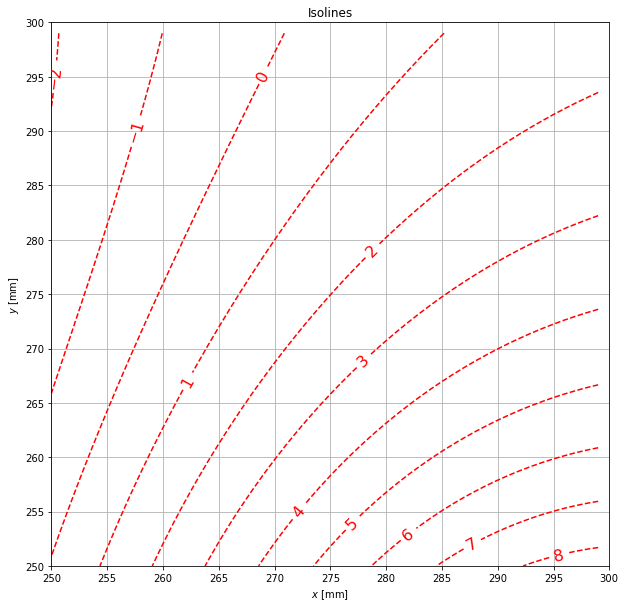

In [5]:
levels = range(-11,12)
x = np.arange(x1,x2)
y = np.arange(y1,y2)
X, Y = np.meshgrid(x, y)
fig, ax = plt.subplots(1, 1, figsize=(10,10),facecolor=(1, 1, 1) )
CS = ax.contour(X, Y, Vclip, levels, colors='red', linestyles='dashed')
#se puede usar cmap en lugar de colors, por defecto es cmap
ax.clabel(CS, inline=True, fontsize=16)
ax.set_title('Isolines')
plt.xlabel('$x$ [mm]')
plt.ylabel('$y$ [mm]')
plt.xticks(np.arange(x1, x2+1, 5)) 
plt.yticks(np.arange(y1, y2+1, 5))
plt.grid()
# plt.savefig("cuba_02.jpg", dpi='figure')
# ax.set_title('Simplest default with labels')

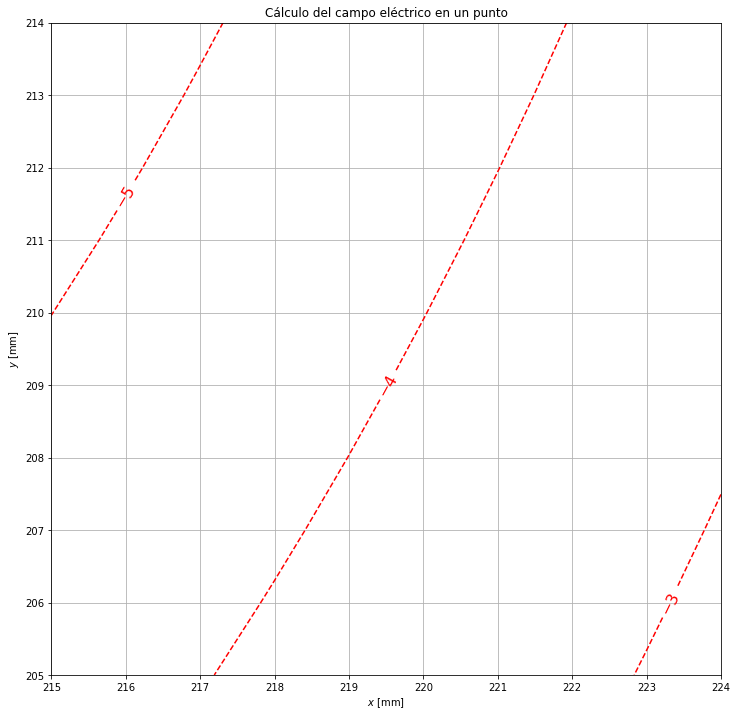

In [6]:
# ROI
x1 = 215
x2 = 225
y1 = 205
y2 = 215
Vclip2 = V[y1:y2,x1:x2]
levels = range(-11,12)
x = np.arange(x1,x2)
y = np.arange(y1,y2)
X, Y = np.meshgrid(x, y)
fig, ax = plt.subplots(1, 1, figsize=(12,12),facecolor=(1, 1, 1) )
CS = ax.contour(X, Y, Vclip2, levels, colors='red', linestyles='dashed')
# CS = ax.contour(X, Y, V, levels, colors='red', linestyles='dashed')
#se puede usar cmap en lugar de colors, por defecto es cmap
ax.clabel(CS, inline=True, fontsize=16)
#Title for lab instructions
ax.set_title('Cálculo del campo eléctrico en un punto')
plt.xlabel('$x$ [mm]')
plt.ylabel('$y$ [mm]')
plt.xticks(np.arange(x1, x2, 1)) 
plt.yticks(np.arange(y1, y2, 1))
plt.grid()
# plt.savefig("cuba_03.jpg", dpi='figure')
# tikzplotlib.save("cuba_03.tex")

In [11]:
#Revisando coordenadas:
xo = 220
yo = 210
print("Sobre la equipotencial de 1 V, y sobre el eje y de la figura: ",V[yo,xo])
xo = 225
yo = 210
print("Desplazado 5 cm hacia la derecha: ", V[yo,xo])

Sobre la equipotencial de 1 V, y sobre el eje y de la figura:  -4.009645100200324
Desplazado 5 cm hacia la derecha:  -3.0150808546954733


Text(0.5, 1.0, 'Isolines')

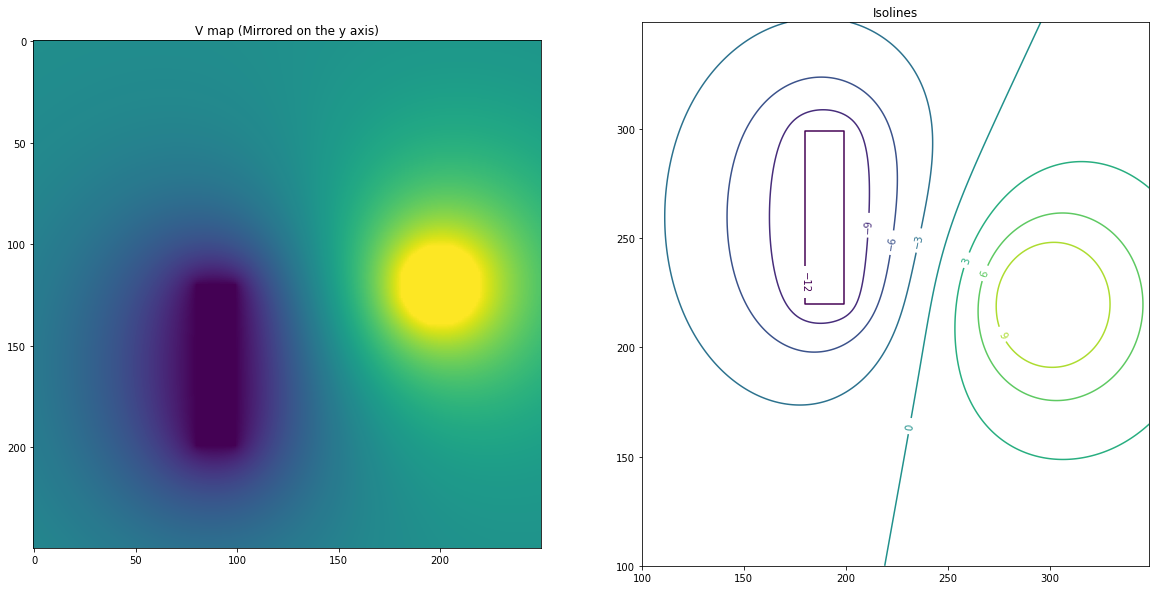

In [12]:
# ROI
x1 = 100
x2 = 350
y1 = 100
y2 = 350
x = np.arange(x1,x2)
y = np.arange(y1,y2)
X, Y = np.meshgrid(x, y)
fig, ax = plt.subplots(1, 2, figsize=(20,10),facecolor=(1, 1, 1) )
ax[0].imshow(V[y1:y2,x1:x2])
ax[0].set_title('V map (Mirrored on the y axis)')
CS2 = ax[1].contour(X, Y, V[y1:y2,x1:x2])
ax[1].clabel(CS2, inline=True, fontsize=10)
ax[1].set_title('Isolines')

## Encontrar el campo eléctrico en un punto

En desarrollo.

Cuidado con las coordenadas, x e y están invertidas respecto de los índices de numpy.

In [26]:
Ef = np.gradient(-1*V)
Ef[0].shape

(1001, 1001)

In [ ]:
# Finding E at some position.
# Extracted from E array and also approximated as incremental quotient.
xo = 220
yo = 210
print("Ex = ", Ef[1][yo,xo]," ; Ey = ", Ef[0][yo,xo])
print("Ex aprox = ",-1*(V[yo,xo+1]-V[yo,xo-1])/2)
print("Ey aprox = ",-1*(V[yo+1,xo]-V[yo-1,xo])/2)

In [ ]:
# levels = range(-11,12)
# ROI
x1 = 240
x2 = 290
y1 = 255
y2 = 305
x = np.arange(x1,x2)
y = np.arange(y1,y2)
X, Y = np.meshgrid(x, y)
fig, ax = plt.subplots(1, 1, figsize=(12,12),facecolor=(1, 1, 1) )
ax.streamplot(X, Y, Ef[1][y1:y2,x1:x2], Ef[0][y1:y2,x1:x2], linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)
ax.set_title('Líneas de campo eléctrico en una región pequeña')
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')
# plt.xticks(np.arange(0, 51, 5)) 
# plt.yticks(np.arange(0, 51, 5))
plt.grid()

In [ ]:
# levels = range(-11,12)
# ROI
x1 = 0
x2 = 500
y1 = 0
y2 = 500
x = np.arange(x1,x2)
y = np.arange(y1,y2)
X, Y = np.meshgrid(x, y)
fig, ax = plt.subplots(1, 1, figsize=(12,12),facecolor=(1, 1, 1) )
ax.streamplot(X, Y, Ef[1], Ef[0], linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)
ax.set_title('Líneas de campo eléctrico')
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')
# plt.xticks(np.arange(0, 51, 5)) 
# plt.yticks(np.arange(0, 51, 5))
plt.grid()